In [1]:
from astropy.io import fits
import clevar
from clevar.match_metrics.recovery import ClCatalogFuncs as r_cf
from clevar.match_metrics.distances import ClCatalogFuncs as d_cf
from clevar.match_metrics.scaling import ClCatalogFuncs as s_cf
import clevar.match_metrics.scaling as scaling

import pandas as pd
from astropy.table import Table
import astropy
from matplotlib import pyplot as plt
import numpy as np
from numcosmo_py import Ncm, Nc
from numcosmo_py.external.pyssc import pyssc as PySSC
Ncm.cfg_init()

In [2]:
hdul_halos = fits.open("../halos/halos.fits")
hdul_amico = fits.open("JPAS_mock_cut_map_detections_refined_amico.fits")

table_halos = hdul_halos[1].data
table_amico = hdul_amico[1].data

logMmin = 13
logMmax = 15


table_amico.columns['Xphys'].name = 'RA'
table_amico.columns['Yphys'].name = 'DEC'
table_amico.columns['Zphys'].name = 'z'
#print(table_amico.columns)

table_halos = table_halos[(table_halos['upid'] == -1)  &  (table_halos['Mvir'] >= 10**logMmin) & (table_halos['Mvir']
             <= 10**logMmax) & (table_halos['DEC'] <=table_amico['DEC'].max()) & (table_halos['DEC'] >= table_amico['DEC'].min())
                      &   (table_halos['RA'] <= table_amico['RA'].max()) & (table_halos['RA'] >=table_amico['RA'].min())]
table_halos['Mvir'] = table_halos['Mvir']/0.6774

print(table_halos.size)
print(table_amico.size)

print("DEC max")
print(table_amico['DEC'].max())
print(table_halos['DEC'].max())
print('\n')
print("DEC min")
print(table_amico['DEC'].min())
print(table_halos['DEC'].min())
print('\n')
print("RA max")
print(table_amico['RA'].max())
print(table_halos['RA'].max())
print('\n')
print("RA min")
print(table_amico['RA'].min())
print(table_halos['RA'].min())
print('\n')
print("z max")
print(table_amico['z'].max())
print(table_halos['redshift_R'].max())
print('\n')
print("z min")
print(table_amico['z'].min())
print(table_halos['redshift_R'].min())

13891
59100
DEC max
50.202178
50.201690673828125


DEC min
39.695278
39.695648193359375


RA max
175.79409
175.79339599609375


RA min
164.22079
164.2232208251953


z max
0.7175
0.6646232218065022


z min
0.0125
0.040906273485568634


## Lambdastar definition of richness ##


In [3]:
catalog_halos = clevar.ClCatalog('Halo catalog',ra=table_halos['RA'] ,dec=table_halos['DEC'] 
                                ,z=table_halos['redshift_R'], mass=table_halos['Mvir'])

catalog_amico = clevar.ClCatalog('Detection catalog',SN=table_amico['SN'], ra=table_amico['RA'], dec=table_amico['DEC'], mass=table_amico['LAMBSTAR'],z=table_amico['z'] )

/global/u2/l/lettieri/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/clevar-0.15.3-py3.12.egg/clevar/catalog/tagdata.py:278: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [4]:
mt = clevar.match.ProximityMatch()

match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'which_radius': 'max', # Case of radius to be used, can be: cat1, cat2, min, max
    'preference': 'redshift_proximity', # options are more_massive, angular_proximity or redshift_proximity
    'catalog1': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                },
    'catalog2': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                }
}

cosmo_astropy = clevar.cosmology.AstroPyCosmology()

mt.match_from_config(catalog_halos, catalog_amico, match_config, cosmo=cosmo_astropy)
mt.save_matches(catalog_halos, catalog_amico, out_dir='temp_lambstar', overwrite=True)


## ClCatalog 1
## Prep mt_cols
### Prep z_cols
* zmin|zmax from config value
### Prep ang_cols
* ang radius from set scale

## ClCatalog 2
## Prep mt_cols
### Prep z_cols
* zmin|zmax from config value
### Prep ang_cols
* ang radius from set scale

## Multiple match (catalog 1)
Finding candidates (Halo catalog)
* 10,601/13,891 objects matched.

## Multiple match (catalog 2)
Finding candidates (Detection catalog)
* 10,726/59,100 objects matched.

## Finding unique matches of catalog 1
Unique Matches (Halo catalog)
* 10,232/13,891 objects matched.

## Finding unique matches of catalog 2
Unique Matches (Detection catalog)
* 10,232/59,100 objects matched.
Cross Matches (Halo catalog)
* 10,231/13,891 objects matched.
Cross Matches (Detection catalog)
* 10,231/59,100 objects matched.


In [5]:
catalog_halos = clevar.ClCatalog('Halo catalog',ra=table_halos['RA'] ,dec=table_halos['DEC'] 
                                ,z=table_halos['redshift_R'], mass=table_halos['Mvir'])

catalog_amico = clevar.ClCatalog('Detection catalog',SN=table_amico['SN'], ra=table_amico['RA'], dec=table_amico['DEC'], mass=table_amico['LAMBSTAR'],z=table_amico['z'] )
mt = clevar.match.ProximityMatch()
mt.load_matches(catalog_halos, catalog_amico, out_dir='temp_lambstar')

halos_match, detections_match = clevar.match.get_matched_pairs(catalog_halos, catalog_amico, 'cross')

/global/u2/l/lettieri/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/clevar-0.15.3-py3.12.egg/clevar/catalog/tagdata.py:278: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


Halo catalog
    * ClEvar used in matching: 0.15.3
 * Total objects:    13,891
 * multiple (self):  10,601
 * multiple (other): 10,601
 * unique (self):    10,232
 * unique (other):   10,232
 * cross:            10,231

Detection catalog
    * ClEvar used in matching: 0.15.3
 * Total objects:    59,100
 * multiple (self):  10,726
 * multiple (other): 10,726
 * unique (self):    10,232
 * unique (other):   10,232
 * cross:            10,231


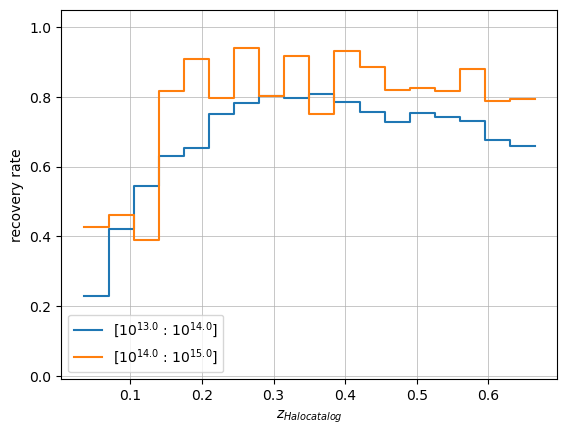

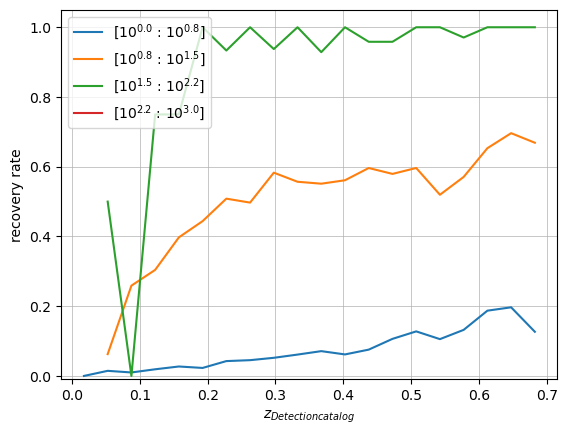

In [6]:
from clevar.match_metrics import recovery

zbins = np.linspace(0, 0.7, 21)
mbins = np.logspace(13, 15, 3)
rbins = np.logspace(0 , 3 , 5)
info = recovery.plot(catalog_halos, 'cross', zbins, mbins, shape='steps')
plt.savefig("recovery_halos.jpg")
plt.show()

info = recovery.plot(catalog_amico, 'cross', zbins, rbins, shape='line')
plt.savefig("recovery_detections.jpg")
plt.show()


## Lambda definition of richness ##

In [7]:
catalog_halos = clevar.ClCatalog('Halo catalog',ra=table_halos['RA'] ,dec=table_halos['DEC'] 
                                ,z=table_halos['redshift_R'], mass=table_halos['Mvir'])

catalog_amico = clevar.ClCatalog('Detection catalog',SN=table_amico['SN'], ra=table_amico['RA'], dec=table_amico['DEC'], mass=table_amico['LAMB'],z=table_amico['z'] )

/global/u2/l/lettieri/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/clevar-0.15.3-py3.12.egg/clevar/catalog/tagdata.py:278: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [8]:
mt = clevar.match.ProximityMatch()

match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'which_radius': 'max', # Case of radius to be used, can be: cat1, cat2, min, max
    'preference': 'redshift_proximity', # options are more_massive, angular_proximity or redshift_proximity
    'catalog1': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                },
    'catalog2': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                }
}

cosmo_astropy = clevar.cosmology.AstroPyCosmology()

#mt.match_from_config(catalog_halos, catalog_amico, match_config, cosmo=cosmo_astropy)
#mt.save_matches(catalog_halos, catalog_amico, out_dir='temp_lamb', overwrite=True)